# Computational methods in Physics
## Week 7
#### Prof. Michael Wood-Vasey
##### [based on materials from Prof. Brian D'Urso]
##### University of Pittsburgh, Department of Physics and Astronomy

## Ordinary Differential Equations

### ODEs

#### The Problem
We will be looking at solving equations like:
\begin{equation*}
\frac{dy}{dt} = f(t, y)
\end{equation*}
where:

* The function $f(t, y)$ is given.
* An initial condition is given, e.g. $y(0) = 1.0$.
* The problem is to find $y(t)$ for a requested range of $t$.
* We will refer to finding the solution $y(t)$ as
solving or integrating a
first order
ordinary differential equation (ODE)
initial value problem.

#### Order of an ODE
The *order* of an ODE is the highest degree of the derivative on the left hand side (LHS) of the equation.

* The general form of a first order ODE is:
\begin{equation*}
\frac{dy}{dt} = f(t, y)
\end{equation*}
* The general form of a second order ODE is:
\begin{equation*}
\frac{d^2y}{dt^2}+ \lambda \frac{dy}{dt} = f\left(t, \frac{dy}{dt}, y\right)
\end{equation*}
* In each case:

* $t$ is the *independent* variable.
* $y$ is the *dependent* variable.

#### Ordinary and Partial Differential Equations

* Ordinary differential equations (ODEs)
have one independent variable, e.g. $t$:

\begin{equation*}
\frac{d^2y}{dt^2} = - k y
\end{equation*}

* Partial differential equations (PDEs)
have multiple independent variables, e.g. $t$ and $x$:

\begin{equation*}
\frac{\partial^2y}{\partial t^2} - c^2 \frac{\partial^2y}{\partial x^2} = 0
\end{equation*}

* For now, we will work only with ODEs.

#### Linear and Nonlinear ODEs
One advantage of numerical methods is that both
*linear* and *nonlinear* ODEs can generally be solved.

* An ODE is *linear* if $y$ and $\frac{d^n y}{dt^n}$
appear only to the first power.

* For linear ODEs, any linear superposition
of solutions is also a solution.
* If $A(t)$ and $B(t)$ are solutions, then
\begin{equation*}
y(t) = \alpha A(t) + \beta B(t)
\end{equation*}
is also a solution for any values of $\alpha$ and $\beta$.

* An ODE is *nonlinear* if $y$ and $\frac{d^n y}{dt^n}$ appear
with powers $>1$ or in other nonlinear functions.

* For nonlinear ODEs, linear superpositions
of solutions are not generally solutions.

#### Initial and Boundary Value Problems

* An ODE of order $n$ requires $n$ conditions to give a unique solution (one arbitrary constant is added for each integration step).
* If $n$ conditions are given at the same point in time, e.g:
$y(t_0)=\alpha$, $y^\prime (t_0)=\beta$, for some $t_0$, $\alpha$, and $\beta$,
they are called *initial conditions* and the problem is an *initial value problem*.
* If $n$ conditions are given at different points in time, e.g:
$y(t_1)=\alpha$, $y(t_2)=\beta$, for some $t_1 \neq t_2$,
they are called *boundary conditions* and the problem is a *boundary value problem*.

### Solving

#### Solving an ODE: General Strategy

* Start with your equation, e.g.:
\begin{equation*}
\frac{dy}{dt} = f(t, y)
\end{equation*}
* Write it as a system of first order ODEs, if neccesary.
(We will discuss this in more detail next week.)
* Start at the initial condition, e.g. $y(t_0) = \alpha$.
* Use some method which evaluates $f(t, y)$
to find $y(t)$ at some other time $y(t+\delta t)$.
* Repeat to get an array of $(t, y(t))$ pairs.

#### Explicit Euler Method

* The simplest method of solution follows directly from the definition of the derivative:
\begin{equation*}
\frac{dy}{dt} = \lim_{\delta t \rightarrow 0} \frac{y(t+\delta t) - y(t)}{\delta t}
\end{equation*}
* So, if we go back to the equation, e.g.:
\begin{equation*}
\frac{dy}{dt} = f(t, y)
\end{equation*}
we can try:
\begin{equation*}
y(t+\delta t) = y(t) + \delta t \; f(t, y(t))
\end{equation*}
* This is the *explicit Euler method*.

#### Explicit Euler Method Implementation

In [203]:
# Very Simple
# y = t^2
# dy/dt = 2 t
##  We adopt the y, t order here to match scipy.integrate.odeint
def f(y, t):
    return 2*t

def euler_explicit_1d_step(f, y, t, dt):
    return y + dt * f(y, t)

def euler_explicit_1d(f, y0, t):
    """Solve a one-dimensional ODE using Euler's method for an initial value problem.
    
    Inputs
    ------
    f  -- Function dy/dt = f(y, t) to solve.
    y0 -- Initial value of y.
    t  -- Array of time steps at which to solve for y.
    
    Returns
    -------
    y  -- Array of y values representing the approximate solution to the ODE
          dy/dt = f(t, y).  The size will match the size of t.
    """

    y = np.zeros_like(t)
    y[0] = y0   # Initial value

    for i in range(0,len(t)-1):
        dt = t[i+1]-t[i]
        y[i+1] = euler_explicit_1d_step(f, y[i], t[i], dt)

    return y

In [228]:
### Example calling of this function
N = 100001
t = np.linspace(0, 1000, N)
y0 = 5

y = euler_explicit_1d(f, y0, t)

In [229]:
%matplotlib inline
import matplotlib.pyplot as plt

In [230]:
def y_analytic(t):
    return t**2

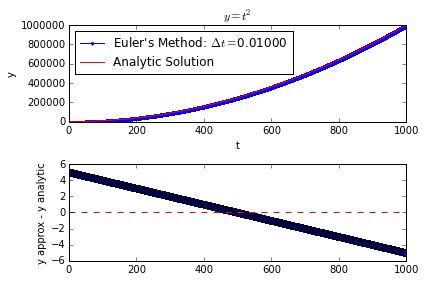

In [231]:
plt.subplot(2,1,1)
dt=t[1]-t[0] # assume it's the same for all
plt.plot(t, y, marker='.', label=r"Euler's Method: $\Delta t = $%.5f" % dt)
plt.plot(t, y_analytic(t), linestyle='-', color='red', label='Analytic Solution')

plt.xlabel('t')
plt.ylabel('y')
plt.title(r'$y=t^2$')

plt.legend(numpoints=1, loc='upper left')

plt.subplot(2,1,2)
plt.plot(t, y-y_analytic(t), marker='o')
plt.axhline(0, linestyle='dashed', color='red')
max_ylim = np.max(np.abs(list(plt.ylim())))
plt.ylim(-max_ylim, +max_ylim)

plt.ylabel('y approx - y analytic')

plt.tight_layout()

#### Explicit Euler Method: Mass and Spring

* Consider the mass and spring system with $F=ma=-kx$:
\begin{equation*}
\frac{d^2x}{dt^2} = -\frac{k}{m}x
\end{equation*}
* This can be rewritten as two first order ODEs:
$\frac{dx}{dt} = v(t)$ and $\frac{dv}{dt} = -\frac{k}{m}x$.
* For simplicity, take $\frac{k}{m} = 1$.
* If we have initial conditions $x_0$ and $v_0$ at $t_0=0$,
we can write:
\begin{align*}
x_{i+1} &= x_i + v_i \; \delta t \\
v_{i+1} &= v_i - x_i \; \delta t \\
\end{align*}

In [233]:
# Let's go through how to set up the 2D case, for which we need two equations
# d^2 x / d t^2 = - (k/m) x
#   ===>
# dx/dt = v(t)
# dv/dt = - (k/m) x(t)
# k/m = 1
def f(x, v, t):
    return np.array([v, -x])

def euler_explicit_2d_step(f, x, v, t, dt):
    return np.array([x, v]) + dt * f(x, v, t)

def euler_explicit_2d(f, x0, v0, t):
    """Solve a two-dimensional ODE using Euler's method for an initial value problem.
    
    Inputs
    ------
    f  -- Function (dx/dt, dy/dt) = f(t, x, v) to solve.
    t  -- Array of time steps at which to solve for x, v.
    x0 -- Initial value of x.
    v0 -- Initial value of v.
    
    Returns
    -------
    (x, v) -- Tuple of x, v arrays representing the approximate solution to the ODE
          (dx/dt, dv/dt) = f(t, x, v).  The size will match the size of t.
    """

    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0   # Initial value
    v[0] = v0   # Initial value
    
    for i in range(0,len(t)-1):
        dt = t[i+1]-t[i]
        x[i+1], v[i+1] = euler_explicit_2d_step(f, x[i], v[i], t[i], dt)

    return x, v


    

In [234]:
### Example calling of this function
N = 10001
t = np.linspace(0, 100, N)
x0, v0 = (0, 10)

x, v = euler_explicit_2d(f, x0, v0, t)

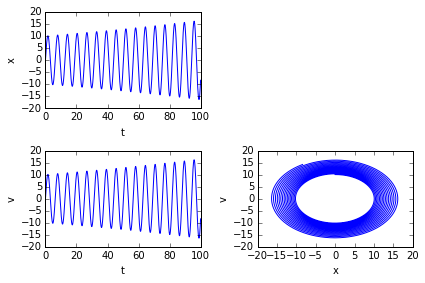

In [235]:
dt=t[1]-t[0] # assume it's the same for all

plt.subplot(2,2,1)
plt.plot(t, x, label=r"Euler's Method: $\Delta t = $%.5f" % dt)
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(2,2,3)
plt.plot(t, x, label=r"Euler's Method: $\Delta t = $%.5f" % dt)
plt.xlabel('t')
plt.ylabel('v')

plt.subplot(2,2,4)
plt.plot(x, v, label=r"Euler's Method: $\Delta t = $%.5f" % dt)
plt.xlabel('x')
plt.ylabel('v')

plt.tight_layout()

I bet we can generalize this _1d, _2d sillyness with just a little work:

Let's take `y` to be in general the vector of variable arrays we want to solve.  E.g., in the first simple case it was `y=y`.  For the spring+mass it's `y=[x,v]`.  `y0` will similarly hold the initial values for each of the arrays in `y`.

In [238]:
# The generalized case is actually shorter:
# We just have to accept a little bit of care when setting up 
#   our function to integrate.
# First we have to practice writing functions that represent
#   the equations we want to solve:
def f(y, t, k=1):
    x, v = y[0], y[1]
    return np.array([v, -k*x])

### Oh, this one's easy:
### But let's start calling the variable `func`
def euler_explicit_step(func, y, t, dt):
    return y + dt * func(y, t)

def euler_explicit(func, y0, t):
    """Solve an N-dimen ODE using an explicit Euler's method for an initial value problem.
    
    Inputs
    ------
    func  -- Function (dy/dt) = f(y, t) to solve.  y in a vector of arrays, in general.
    y0 -- Initial value of y.  Should have an entry for each array in y.
    t  -- Array of time steps at which to solve for y.
    
    Returns
    -------
    y -- vector of arrays representing the approximate solution to the ODE
          y = f(y, t).  The size will match the (len(t), len(y0)).
    """

    num_variables = len(y0)
    y = np.zeros((len(t), num_variables))
    y[0,:] = y0  # Store initial values
        
    for i in range(0,len(t)-1):
        dt = t[i+1]-t[i]
        y[i+1,:] = euler_explicit_step(func, y[i,:], t[i], dt)

    return y

In [239]:
def plot_spring_mass(t, x, v, energy):
    
    dt=t[1]-t[0] # assume it's the same for all
    
    plt.subplot(2,2,1)
    plt.plot(t, x, label=r"Euler's Method: $\Delta t = $%.5f" % dt)
    plt.xlabel('t')
    plt.ylabel('x')

    plt.subplot(2,2,3)
    plt.plot(t, x, label=r"Euler's Method: $\Delta t = $%.5f" % dt)
    plt.xlabel('t')
    plt.ylabel('v')

    plt.subplot(2,2,4)
    plt.plot(x, v, label=r"Euler's Method: $\Delta t = $%.5f" % dt)
    plt.xlabel('x')
    plt.ylabel('v')
    
    plt.subplot(2,2,2)
    plt.plot(t, energy)
    plt.xlabel('t')
    plt.ylabel(r'energy$ = \frac{1}{2}(x^2 + v^2)$')

    plt.tight_layout()

In [240]:
### Example calling of this function
def solve_spring_mass(N=10001, x0=0, v0=10):
    t = np.linspace(0, 100, N)
    y0 = [x0, v0]

    r = euler_explicit(f, y0, t)
    x, v = r[:,0], r[:,1]
    
    # More fully, energy = 0.5 * (k * x**2 + m * v**2)
    # But in our k/m=1 units, we can just say that the Energy/m is:
    specific_energy = 0.5 * (x**2 + v**2)  
    
    plot_spring_mass(t, x, v, specific_energy)

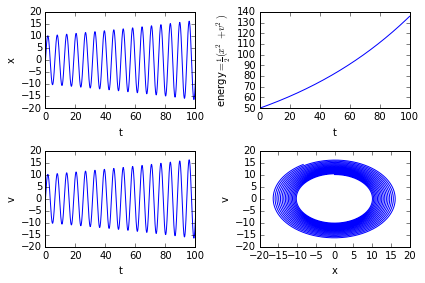

In [241]:
solve_spring_mass()

## WAIT!
I thought energy was supposed to be conserved!  
WHAT HAPPENED?!

Euler's method does not conserve energy.  To be a bit glib, that's because we didn't ask it too.  It doesn't know anything about physics, or what we may care about.  It is just trying to approximate a solution to a first-order ODE.

Let's explore the energy non-conservation a bit more in an interactive mode, then talk about solutions:

In [242]:
from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display, HTML

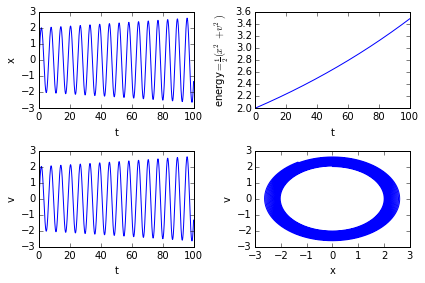

In [243]:
interact(solve_spring_mass, N=(0,100000,1000), x0=(-10,10), v0=(-10,10))


So we can make things better with a smaller timestep, but the problem remains, just at a lower level.

#### Implicit Euler Method: Mass and Spring

* There is an asymmetry to our timestep.
We could have chosen:
\begin{align*}
x_{i+1} &= x_i + v_{i+1} \; \delta t \\
v_{i+1} &= v_i - x_{i+1} \; \delta t \\
\end{align*}
* This is the *implicit Euler method*.
* We need to solve a matrix equation at each time step
to find $x_{i+1}$ and $v_{i+1}$:
\begin{equation*}
\begin{pmatrix}
1 & -\delta t \\
\delta t & 1 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
x_{i+1} \\
v_{i+1} \\
\end{pmatrix}
=
\begin{pmatrix}
x_{i} \\
v_{i}
\end{pmatrix}
\end{equation*}
* This is harder for nonlinear problems, so implicit methods are not as common as explicit methods.

We won't talk about fully implicit methods further this week, but you should know about them.  What we will talk about next is a *semi-implicit* method.

#### Conservation of Energy?

* Many methods do not conserve energy!
* Harmonic oscillator $(x, v)$ trajectories should trace out circles in phase space, since:
\begin{equation*}
E = \tfrac{1}{2}(x^2 + v^2)
\end{equation*}
* *Symplectic* methods "almost" exactly conserve energy.

* For Hamiltonian systems.
* Conserve "volume" in phase space.
* "Conservation of pain": Other errors are introduced.
(a.k.a. the blanket principle: The blanket is always too short to cover both your feet and your head.)
* E.g., the phase of the harmonic oscillator over time is less accurate.

#### Symplectic Euler Method

* If the (classical) Hamiltonian is of the form:
\begin{equation*}
H = T(t, p) + V(t, q) \quad\textrm{e.g.}\quad H = \frac{p^2}{2} + V(q)
\end{equation*}
* Then the differential equations take the form:
\begin{align*}
\frac{dq}{dt} = \frac{\partial T}{\partial p} \quad &\Rightarrow \quad \frac{dx}{dt} = f(t, v) \\
\frac{dp}{dt} = -\frac{\partial V}{\partial q} \quad &\Rightarrow \quad \frac{dv}{dt} = g(t, x) \\
\end{align*}
* If we have initial conditions $x_0$ and $v_0$ at $t_0$:
\begin{align*}
x_{i+1} &= x_i + f(t_i, v_i) \; \delta t  \\
v_{i+1} &= v_i + g(t_i, x_{i+1}) \; \delta t  \\
\end{align*}
* For the mass and spring, these are:
\begin{align*}
x_{i+1} &= x_i + v_i \; \delta t  \\
v_{i+1} &= v_i - x_{i+1} \; \delta t  \\
\end{align*}

The difference is subtle but key:  
`v[i+1] = v[i] - x[i+1] * dt`  
instead of   
`v[i+1] = v[i] - x[i] * dt`.

It's key both in conserving energy, but also in changing how we think about calculating the `i+1` step.

In [244]:
# Prepare an exception Error class to raise if we have to do more than 2-D.
class DimensionError(Exception):
     def __init__(self, value):
         self.value = value
     def __str__(self):
         return repr(self.value)

In [245]:
# The generalized case is actually shorter:
# We just have to accept a little bit of care when setting up 
#   our function to integrate.
# First we have to practice writing functions that represent
#   the equations we want to solve:
def f(y, t, k=1):
    x, v = y[0], y[1]
    return np.array([v, -k*x])

### Oh, this one's easy:
### But let's start calling the variable `func`
def euler_symplectic_step(func, y, t, dt):
    return y + dt * func(y, t)

def euler_symplectic(func, y0, t):
    """Solve a two-dimensional ODE using Euler's symplectic method for an initial value problem.
    
    Inputs
    ------
    func  -- Function (dy/dt) = f(y, t) to solve.  y in a vector of arrays, in general.
    y0 -- Initial value of y.  Should have an entry for each array in y.
    t  -- Array of time steps at which to solve for y.
    
    Returns
    -------
    y -- vector of arrays representing the approximate solution to the ODE
          y = f(y, t).  The size will match the size of t.
    """

    num_variables = len(y0)
    if num_variables != 2:
        raise DimensionError("I can only do 2-d symplectic.")
        
    y = np.zeros((len(t), num_variables))
    y[0,:] = y0  # Store initial values
        
    print("y0: ", y0)
    for i in range(0,len(t)-1):
        dt = t[i+1]-t[i]
        # Build up so that, in general, the jth variable is updated 
        #   with the i+1 position of the (j-1)th variable.
        # Requires an extra function call for each variable
        # Currently only defined for 2-D.
        r1 = euler_symplectic_step(func, y[i  ,:], t[i], dt)
        y[i+1,0] = r1[0]
        y[i+1,1] = y[i,1]

        r2 = euler_symplectic_step(func, y[i+1,:], t[i], dt)
        y[i+1,1] = r2[1]

    return y

In [246]:
### Generalize to accept a solver as an argument
def solve_spring_mass(N=10001, t_max=100, x0=10, v0=10, odesolver=euler_symplectic):
    t = np.linspace(0, t_max, N)
    y0 = [x0, v0]

    r = odesolver(f, y0, t)
    x, v = r[:,0], r[:,1]
    
    # More fully, energy = 0.5 * ((k*x)**2 + m * v**2)
    # But in our k/m=1 units, we can just say that the Energy/m is:
    specific_energy = 0.5 * (x**2 + v**2)  
    
    plot_spring_mass(t, x, v, specific_energy)

y0:  [10, 10]


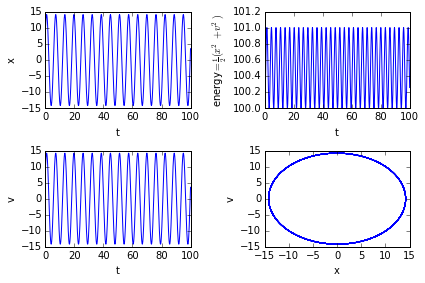

In [247]:
solve_spring_mass(N=10001, t_max=100, odesolver=euler_symplectic)

y0:  [10, 10]


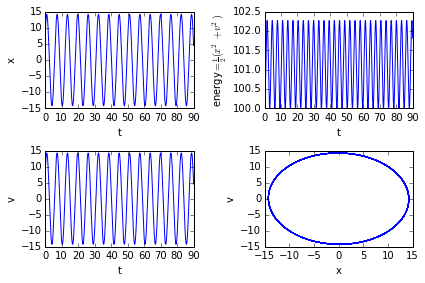

In [248]:
interactive(solve_spring_mass, N=(0,100000,1000), t_max=(0,100,10), x0=(-10,10), v0=(-10,10), 
            odesolver={'Euler' : euler_explicit, 'Euler symplectic' : euler_symplectic})


### Much better!

------

#### Higher Order Methods

* Euler method evaluates $f$ at one endpoint of step.
* Euler method is first order: local error scales like $\delta t^2$.
\begin{align*}
y(t+\delta t) &= y(t) + \delta t \frac{dy}{dt} + \mathcal{O}(\delta t ^2) \\
&= y(t) + \delta t \; f(y, t) + \mathcal{O}(\delta t ^2)
\end{align*}
* Global error is $\mathcal{O}(\delta t)$: smaller $\delta t\rightarrow$ more steps.
* Can we improve the scaling of the error?
* How about evaluating $f$ at the midpoint of the step?

![](figures/rk2.png)

#### Second Order Runge-Kutta
If we aim to evaluate $f$ at the midpoint, we get a version of the *second order Runge-Kutta method*:
\begin{align*}
y(t+\delta t) &= y(t) + \delta t \; f\left[y(t)+\tfrac{\delta t}{2}f(y)\right] \\
&= y(t) + \delta t \left(f[y(t)] + \tfrac{\delta t}{2} f[y(t)]\frac{df[y(t)]}{dx}+\mathcal{O}(\delta t ^2)\right) \\
&= y(t) + \delta t \; f[y(t)] + \frac{\delta t^2}{2}\frac{df[y(t)]}{dt}+\mathcal{O}(\delta t ^3) \\
\end{align*}
Evaluate as:
\begin{align*}
y_{n+1} &= y_n + k_2 \\
k_2 &= \delta t \; f\left(t_n + \tfrac{\delta t}{2}, y_n + \tfrac{k_1}{2}\right) \\
k_1 &= \delta t \; f(t_n, y_n) \\
\end{align*}

#### Fourth Order Runge-Kutta

* Schemes with $q$ intermediate steps are known as $(q+1)$-*stage Runge-Kutta*.
* Local error is $\mathcal{O}(\delta t^{q+1})$ only for $q \leq 4$.
* Sweet spot is fourth order Runge-Kutta ($q=4$)
with local error $\mathcal{O}(\delta t^5)$. Evaluate as:

\begin{align*}
y_{n+1} &= y_n + \tfrac{1}{6}(k_1+2k_2+2k_3+k_4) \\
k_1 &= \delta t \; f(t_n , y_n) \\
k_2 &= \delta t \; f\left(t_n + \tfrac{\delta t}{2}, y_n + \tfrac{k_1}{2}\right) \\
k_3 &= \delta t \; f\left(t_n + \tfrac{\delta t}{2}, y_n + \tfrac{k_2}{2}\right) \\
k_4 &= \delta t \; f(t_n+\delta t, y_n+k_3) \\
\end{align*}

* A good general-purpose algorithm.

#### Other Methods

* Adaptive step size Runge-Kutta
a.k.a. *Runge-Kutta-Fehlberg*:

* Changes step size based on an estimate of the error.
* Extra computational cost may or may not be worthwhile.

* Many other methods exist.
* Particular methods may be most appropriate for a given problem depending on behavior of equations and desired goal.

In [16]:
from scipy.integrate import odeint
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y,t0,...)
    
    where y can be a vector.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to 